## Import legal packages
<strike>from sklearn.linear_models import LogisticRegressionCV</strike><br>
<strike>import tensorflow as tf</strike>

In [1]:
from ipywidgets import interact, interact_manual
from multilayer_perceptron import MLP
from tqdm import tqdm_notebook as tqdm
import helpers
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pickle

## Data for this notebook

In [2]:
READ_FROM_DISK = True
DATA_FILE = "../data.pkl"
VOCAB_FILE = "../vocab.pkl"

## Read <font color="green">train</font>, <font color="blue">val</font>, <font color="red">test</font> from disk or build them from the dataset

In [3]:
if READ_FROM_DISK:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(open(DATA_FILE , "rb+"))
    id2word, word2id = pickle.load(open(VOCAB_FILE , "rb+"))
else:
    # Read, tokenize and split dataset
    (X_train, y_train), (X_val, y_val), (X_test, y_test), (id2word, word2id) = helpers.read_aclImdb("../aclImdb/")
    # Save on disk
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), open(DATA_FILE , "wb"))
    pickle.dump((id2word, word2id), open(VOCAB_FILE , "wb"))

print("Sizes - train: {0}, val: {1}, test: {2}".format(len(X_train), len(X_val), len(X_test)))
print("Vocabulary of size {0} and TOP-5 popular words: {1}".format(len(id2word), id2word[:5]))

Sizes - train: 20000, val: 5000, test: 25000
Vocabulary of size 2000 and TOP-5 popular words: ['the', 'a', 'and', 'of', 'to']


## Training

In [4]:
def train(hidden_size=200, epochs=10):
    global model, scores, weights
    scores, weights = {'train': [], 'val': []}, []
    model = MLP(hidden_sizes=[hidden_size, 1])
    for i in tqdm(range(1, epochs + 1)):
        print("Epoch #{0} ->".format(i), end="")
        for x, y in helpers.batches(X_train, y_train):
            model.fit(x, y)
        # Print scores each epoch
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_val, y_val)
        print("train: {0:.2f}%, val: {1:.2f}%".format(train_score * 100, val_score * 100))
        # Save scores each epoch, min_loss will give the index for the best epoch
        scores['train'].append(train_score)
        scores['val'].append(val_score)
        # Save weights each epoch to restore the best model
        weights.append([model.Ws, model.bs])

In [5]:
stats = interact_manual(train, hidden_size=widgets.IntSlider(200, 50, 500, 50), epochs=widgets.IntSlider(10, 10, 300, 10))

interactive(children=(IntSlider(value=200, description='hidden_size', max=500, min=50, step=50), IntSlider(val…

## Plotting

In [14]:
def plot_losses(train, val, filename=None):
    # Plot train, val and guess
    plt.plot(train, label='train', color='blue')
    plt.plot(val, label='val', color='green')
    plt.hlines(1. / 2, colors='r', linewidth=3, xmin=0, xmax=len(train) - 1, label='guess')
    # Legend and axis
    plt.xlabel('epoch #')
    plt.ylabel('accuracy')
    plt.legend()
    if filename: plt.savefig(filename) # Save plot if requested
    plt.show()

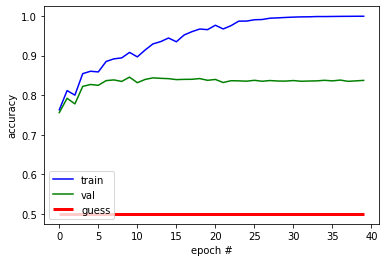

In [15]:
plot_losses(scores['train'], scores['val'], "results20.png")

## Estimating test loss of the best model

In [16]:
best_epoch_idx = scores['val'].index(max(scores['val']))
print("Best model achieved at epoch #{0}".format(best_epoch_idx + 1))
model.Ws, model.bs = weights[best_epoch_idx]
print("Test accuracy: {0:.2f}% (random guess is {1:.2f}%).".format(model.score(X_test, y_test) * 100, 1. / 2 * 100))

Best model achieved at epoch #10
Test accuracy: 83.22% (random guess is 50.00%).
